# i. Introduction

```
===========================================================================================
Milestone I

Name : Yohanes Raditya Wirawan Aruan
Batch : HCK-022

This milestone was created to analyze passenger satisfaction of an airline.
============================================================================================
```

# ii. Problem Statement

This project aims to identify key factors influencing airline passenger satisfaction to develop strategic recommendations for enhancing customer experience and fostering customer loyalty, ultimately contributing to long-term business sustainability


## 5W + 1H Problem Statement

- What
    - What are the key factors that influence airline passenger satisfaction?
    - What strategies can be developed to enhance customer experience and foster loyalty?

- Who
    - Who are the passengers most affected by satisfaction factors (based on class passengers)?
    - Who within the airline organization can act on the insights and implement the recommendations?

- Where
    - Where in the customer journey does the satisfaction level drop?
    - Where can improvements be prioritized for maximum impact on customer satisfaction?

- When
    - When should the recommendations be implemented to see meaningful results?

- Why
    - Why do certain factors significantly influence customer satisfaction?
    - Why is it critical to improve satisfaction for the airlines’s long-term success?

- How
    - How can we identify and measure the key factors influencing satisfaction?
    - How will the recommended strategies be implemented and evaluated for success?


# iii. SMART Analysis


## a. Specific
- The project focuses on identifying key factors influencing airline passenger satisfaction, based on data. Insight will be used to develop actionable recommendations to enhance customer satisfaction and experience.

## b. Measurable
- Identify the **top 3 factors** with the strongest correlation to passenger satisfaction.
- Achieve **50% satisfied passengers**.
- Provide a report with insights and at least **three actionable strategies** for improvement.

## c. Achievable
- Utilize statistical analysis and visualization tools on the dataset to develop actionable recommendations.

## d. Relevant
- Improving passenger satisfaction aligns with business goals by:
  - Fostering customer loyalty.
  - Enhancing brand reputation.
  - Indirectly contributing to business growth through improved customer retention.

## e. Time-Bound
- Deliver a report containing insights and recommendations by **Q1 2025**.




# iv. Import Libraries

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# v. Data Loading

In [26]:
# Make function read file csv
df_airlines = pd.read_csv("test.csv")

In [27]:
# All columns
pd.set_option('display.max_columns', None)

In [28]:
df_airlines.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


# vi. Data Cleaning

In [29]:
df_airlines = df_airlines.drop(['Unnamed: 0'], axis=1)

In [30]:
# Convert column names to lowercase
df_airlines.columns = df_airlines.columns.str.lower()

# Convert all string values in the dataframe to lowercase
df_airlines = df_airlines.applymap(lambda s: s.lower() if type(s) == str else s)

# Display the updated dataframe
df_airlines.head()

/var/folders/mk/_r6v0z0s6h9bh_c4841c6yz00000gn/T/ipykernel_9383/3694154659.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_airlines = df_airlines.applymap(lambda s: s.lower() if type(s) == str else s)


,id,gender,customer type,age,type of travel,class,flight distance,inflight wifi service,departure/arrival time convenient,ease of online booking,gate location,food and drink,online boarding,seat comfort,inflight entertainment,on-board service,leg room service,baggage handling,checkin service,inflight service,cleanliness,departure delay in minutes,arrival delay in minutes,satisfaction
0,19556,female,loyal customer,52,business travel,eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,female,loyal customer,36,business travel,business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,male,disloyal customer,20,business travel,eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,male,loyal customer,44,business travel,business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,female,loyal customer,49,business travel,eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


## a. Handling Missing Value

In [31]:
df_airlines.isna().sum()

id                                    0
gender                                0
customer type                         0
age                                   0
type of travel                        0
class                                 0
flight distance                       0
inflight wifi service                 0
departure/arrival time convenient     0
ease of online booking                0
gate location                         0
food and drink                        0
online boarding                       0
seat comfort                          0
inflight entertainment                0
on-board service                      0
leg room service                      0
baggage handling                      0
checkin service                       0
inflight service                      0
cleanliness                           0
departure delay in minutes            0
arrival delay in minutes             83
satisfaction                          0
dtype: int64

**<u>Insight: </u>**

The 'arrival delay in minutes' column has 83 missing values

Note:

Before imputing missing values, first examine the data distribution.

Using a threshold of 0.5 (skewness interpretation comes from statistical conventions:

- **Symmetrical (Normal):**  
  Skewness is close to 0 (generally in the range of -0.5 to 0.5).

- **Moderate Skewness:**  
  Skewness is between 0.5 and 1 (or -0.5 and -1).

- **Severely Skewed (Extreme):**  
  Skewness is greater than 1 or less than -1.





In [32]:
df_airlines['arrival delay in minutes'].skew()

6.984497404158308

**<u>Insight: </u>**

The output shows that the 'arrival delay in minutes' column has a skewness value indicating that the data is not normally distributed. Therefore, the median value is used to impute the missing values in this column. This approach ensures that the imputed values are representative of the central tendency of the data without being affected by the skewness.

In [33]:
df_airlines['arrival delay in minutes'] = df_airlines['arrival delay in minutes'].fillna(df_airlines['arrival delay in minutes'].median())

In [34]:
df_airlines.isna().sum()

id                                   0
gender                               0
customer type                        0
age                                  0
type of travel                       0
class                                0
flight distance                      0
inflight wifi service                0
departure/arrival time convenient    0
ease of online booking               0
gate location                        0
food and drink                       0
online boarding                      0
seat comfort                         0
inflight entertainment               0
on-board service                     0
leg room service                     0
baggage handling                     0
checkin service                      0
inflight service                     0
cleanliness                          0
departure delay in minutes           0
arrival delay in minutes             0
satisfaction                         0
dtype: int64

In [35]:
df_airlines.to_csv('M1v2.csv')

# vii. Analysis and Calculation

In [36]:
df_airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   gender                             25976 non-null  object 
 2   customer type                      25976 non-null  object 
 3   age                                25976 non-null  int64  
 4   type of travel                     25976 non-null  object 
 5   class                              25976 non-null  object 
 6   flight distance                    25976 non-null  int64  
 7   inflight wifi service              25976 non-null  int64  
 8   departure/arrival time convenient  25976 non-null  int64  
 9   ease of online booking             25976 non-null  int64  
 10  gate location                      25976 non-null  int64  
 11  food and drink                     25976 non-null  int

**<u>Insight: </u>**

- Number of Entries: The DataFrame contains 25,976 entries, indicating a substantial dataset.

- Columns: There are 24 columns in total, covering various aspects of airline customer data.

- Data Types:

    - Integer Columns (int64): 18 columns, including id, age, flight distance, and various service ratings.
    - Float Columns (float64): 1 column, arrival delay in minutes.
    - Object Columns (object): 5 columns, including gender, customer type, type of travel, class, and satisfaction.

- Non-Null Values: All columns have 25,976 non-null values, indicating there are no missing values in the dataset.

- Memory Usage: The DataFrame uses approximately 4.8 MB of memory.

- Key Columns:
    - Demographic Information: id, gender, age, customer type, type of travel, class.
    - Service Ratings: inflight wifi service, departure/arrival time convenient, ease of online booking, gate location, food and drink, online boarding, seat comfort, inflight entertainment, on-board service, leg room service, baggage handling, checkin service, inflight service, cleanliness.
    - Flight Information: flight distance, departure delay in minutes, arrival delay in minutes.

- Satisfaction: satisfaction.

In [37]:
df_airlines.describe()

,id,age,flight distance,inflight wifi service,departure/arrival time convenient,ease of online booking,gate location,food and drink,online boarding,seat comfort,inflight entertainment,on-board service,leg room service,baggage handling,checkin service,inflight service,cleanliness,departure delay in minutes,arrival delay in minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25976.000000
mean,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.693756
std,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.466787
min,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


**<u>Insight: </u>**

- Service Ratings: Most service ratings have a mean around 3 to 4, indicating average to good satisfaction.

- Delays: Both departure and arrival delays have high variability, with a significant number of flights experiencing no delays (median = 0).

- Age Distribution: The passengers' ages range widely, with a mean age of around 40 years.

- Flight Distance: The flight distances vary significantly, with an average of around 1,194 miles



In [38]:
df_airlines.nunique()

id                                   25976
gender                                   2
customer type                            2
age                                     75
type of travel                           2
class                                    3
flight distance                       3281
inflight wifi service                    6
departure/arrival time convenient        6
ease of online booking                   6
gate location                            5
food and drink                           6
online boarding                          6
seat comfort                             5
inflight entertainment                   6
on-board service                         6
leg room service                         6
baggage handling                         5
checkin service                          5
inflight service                         6
cleanliness                              6
departure delay in minutes             313
arrival delay in minutes               320
satisfactio

**<u>Insight: </u>**

- ID: Each entry has a unique ID (25976 unique values), indicating no duplicates.
- Gender: There are 2 unique values, likely representing male and female.
- Customer Type: There are 2 unique values, possibly representing new and returning customers.
- Age: There are 75 unique ages, indicating a diverse age range among passengers.
- Type of Travel: There are 2 unique values, likely representing business and personal travel.
- Class: There are 3 unique values, likely representing economy, business, and first class.
- Flight Distance: There are 2005 unique flight distances, indicating a wide range of flight lengths.
- Service Ratings: Most service rating columns have 6 unique values, likely representing a scale from 0 to 5.
- Baggage Handling: There are 5 unique values, indicating some variation in the rating scale.
- Departure Delay in Minutes: There are 65 unique values, indicating a variety of delay times.
- Arrival Delay in Minutes: There are 129 unique values, indicating a wide range of arrival delay times.
- Satisfaction: There are 2 unique values, likely representing satisfied and dissatisfied customers.

**<u>Summary: </u>**
- The dataset contains a diverse range of ages and flight distances.
- Service ratings are generally on a scale from 0 to 5.
- There is a variety of delay times for both departure and arrival.
- The dataset includes both demographic and service-related information, which can be useful for detailed analysis of customer satisfaction and service performance.

## a. Inferential statistical calculations

### 1. How can we identify and measure the key factors influencing satisfaction?

In [39]:
service_columns = [
    'inflight wifi service', 'departure/arrival time convenient', 'ease of online booking',
    'gate location', 'food and drink', 'online boarding', 'seat comfort', 'inflight entertainment',
    'on-board service', 'leg room service', 'baggage handling', 'checkin service', 'inflight service', 'cleanliness'
]

# Calculate Kendall Tau correlation for each service column with satisfaction
for column in service_columns:
    corr_tau, pval_k = stats.kendalltau(df_airlines[column], df_airlines['satisfaction'])
    print(f"Service: {column}")
    print(f"Kendall Tau correlation: {corr_tau}, p-value: {pval_k}")
    if pval_k < 0.05:
        print("There is a correlation between", column, "and satisfaction")
    else:
        print("There is no correlation between", column, "and satisfaction")
    print()

Service: inflight wifi service
Kendall Tau correlation: 0.25402992771766525, p-value: 0.0
There is a correlation between inflight wifi service and satisfaction

Service: departure/arrival time convenient
Kendall Tau correlation: -0.05534935168274373, p-value: 1.0733038240699506e-23
There is a correlation between departure/arrival time convenient and satisfaction

Service: ease of online booking
Kendall Tau correlation: 0.1457460824841748, p-value: 1.5786913200888234e-153
There is a correlation between ease of online booking and satisfaction

Service: gate location
Kendall Tau correlation: -0.015111545348807024, p-value: 0.006667090167114733
There is a correlation between gate location and satisfaction

Service: food and drink
Kendall Tau correlation: 0.1914059386592312, p-value: 2.1741164919493624e-259
There is a correlation between food and drink and satisfaction

Service: online boarding
Kendall Tau correlation: 0.48727943219418973, p-value: 0.0
There is a correlation between online 

To identify and measure the key factors influencing satisfaction, we analyzed the Kendall Tau correlation coefficients between various service attributes and the satisfaction rating. The Kendall Tau correlation measures the strength and direction of association between two ranked variables. Here are the insights based on the analysis:

- **Inflight Wifi Service**:
  - **Kendall Tau Correlation**: 0.2540
  - **P-value**: 0.0
  - **Insight**: There is a moderate positive correlation between inflight wifi service and satisfaction. Improving wifi service could enhance overall satisfaction.

- **Departure/Arrival Time Convenient**:
  - **Kendall Tau Correlation**: -0.0553
  - **P-value**: 1.0733e-23
  - **Insight**: There is a very weak negative correlation between departure/arrival time convenience and satisfaction. This suggests that while it has some impact, it is not a strong determinant of satisfaction.

- **Ease of Online Booking**:
  - **Kendall Tau Correlation**: 0.1457
  - **P-value**: 1.5787e-153
  - **Insight**: There is a weak positive correlation between ease of online booking and satisfaction. Simplifying the booking process could slightly improve satisfaction.

- **Gate Location**:
  - **Kendall Tau Correlation**: -0.0151
  - **P-value**: 0.0067
  - **Insight**: There is a very weak negative correlation between gate location and satisfaction, indicating minimal impact on overall satisfaction.

- **Food and Drink**:
  - **Kendall Tau Correlation**: 0.1914
  - **P-value**: 2.1741e-259
  - **Insight**: There is a moderate positive correlation between food and drink quality and satisfaction. Enhancing food and drink options could improve satisfaction.

- **Online Boarding**:
  - **Kendall Tau Correlation**: 0.4873
  - **P-value**: 0.0
  - **Insight**: There is a strong positive correlation between online boarding and satisfaction. Efficient online boarding processes are crucial for high satisfaction.

- **Seat Comfort**:
  - **Kendall Tau Correlation**: 0.3235
  - **P-value**: 0.0
  - **Insight**: There is a moderate positive correlation between seat comfort and satisfaction. Improving seat comfort can significantly enhance passenger satisfaction.

- **Inflight Entertainment**:
  - **Kendall Tau Correlation**: 0.3602
  - **P-value**: 0.0
  - **Insight**: There is a strong positive correlation between inflight entertainment and satisfaction. Providing better entertainment options can greatly improve satisfaction.

- **On-board Service**:
  - **Kendall Tau Correlation**: 0.2962
  - **P-value**: 0.0
  - **Insight**: There is a moderate positive correlation between on-board service and satisfaction. High-quality on-board service is important for passenger satisfaction.

- **Leg Room Service**:
  - **Kendall Tau Correlation**: 0.2818
  - **P-value**: 0.0
  - **Insight**: There is a moderate positive correlation between leg room service and satisfaction. Increasing leg room can improve satisfaction.

- **Baggage Handling**:
  - **Kendall Tau Correlation**: 0.2508
  - **P-value**: 0.0
  - **Insight**: There is a moderate positive correlation between baggage handling and satisfaction. Efficient baggage handling is important for satisfaction.

- **Checkin Service**:
  - **Kendall Tau Correlation**: 0.2140
  - **P-value**: 0.0
  - **Insight**: There is a moderate positive correlation between checkin service and satisfaction. Improving the checkin process can enhance satisfaction.

- **Inflight Service**:
  - **Kendall Tau Correlation**: 0.2426
  - **P-value**: 0.0
  - **Insight**: There is a moderate positive correlation between inflight service and satisfaction. High-quality inflight service is important for satisfaction.

- **Cleanliness**:
  - **Kendall Tau Correlation**: 0.2810
  - **P-value**: 0.0
  - **Insight**: There is a moderate positive correlation between cleanliness and satisfaction. Maintaining cleanliness can significantly improve satisfaction.

---
Summary:
- **Strongest Influencers**: Online boarding, inflight entertainment, and seat comfort have the highest positive correlations with satisfaction, indicating they are key factors.
- **Moderate Influencers**: Inflight wifi service, food and drink, on-board service, leg room service, baggage handling, checkin service, inflight service, and cleanliness also positively influence satisfaction but to a lesser extent.
- **Weak Influencers**: Departure/arrival time convenience and gate location have very weak correlations, suggesting they are less critical to overall satisfaction. 
- By focusing on improving the services with the highest positive correlations, airlines can effectively enhance overall passenger satisfaction.
---

Why Use Kendall Tau Correlation:

- **Non-parametric**: Kendall Tau is a non-parametric statistic, meaning it does not assume a specific distribution of the data. This makes it suitable for ordinal data and non-linear relationships.
- **Robust to Outliers**: Kendall Tau is less sensitive to outliers compared to Pearson correlation, providing a more robust measure of association.
- **Rank-based**: It measures the strength and direction of association between two ranked variables, making it ideal for ordinal data or when the relationship between variables is not strictly linear.
- **Interpretability**: The Kendall Tau correlation coefficient ranges from -1 to 1, where:
  - 1 indicates a perfect positive association.
  - -1 indicates a perfect negative association.
  - 0 indicates no association.
  This makes it easy to interpret the strength and direction of the relationship between service attributes and satisfaction.

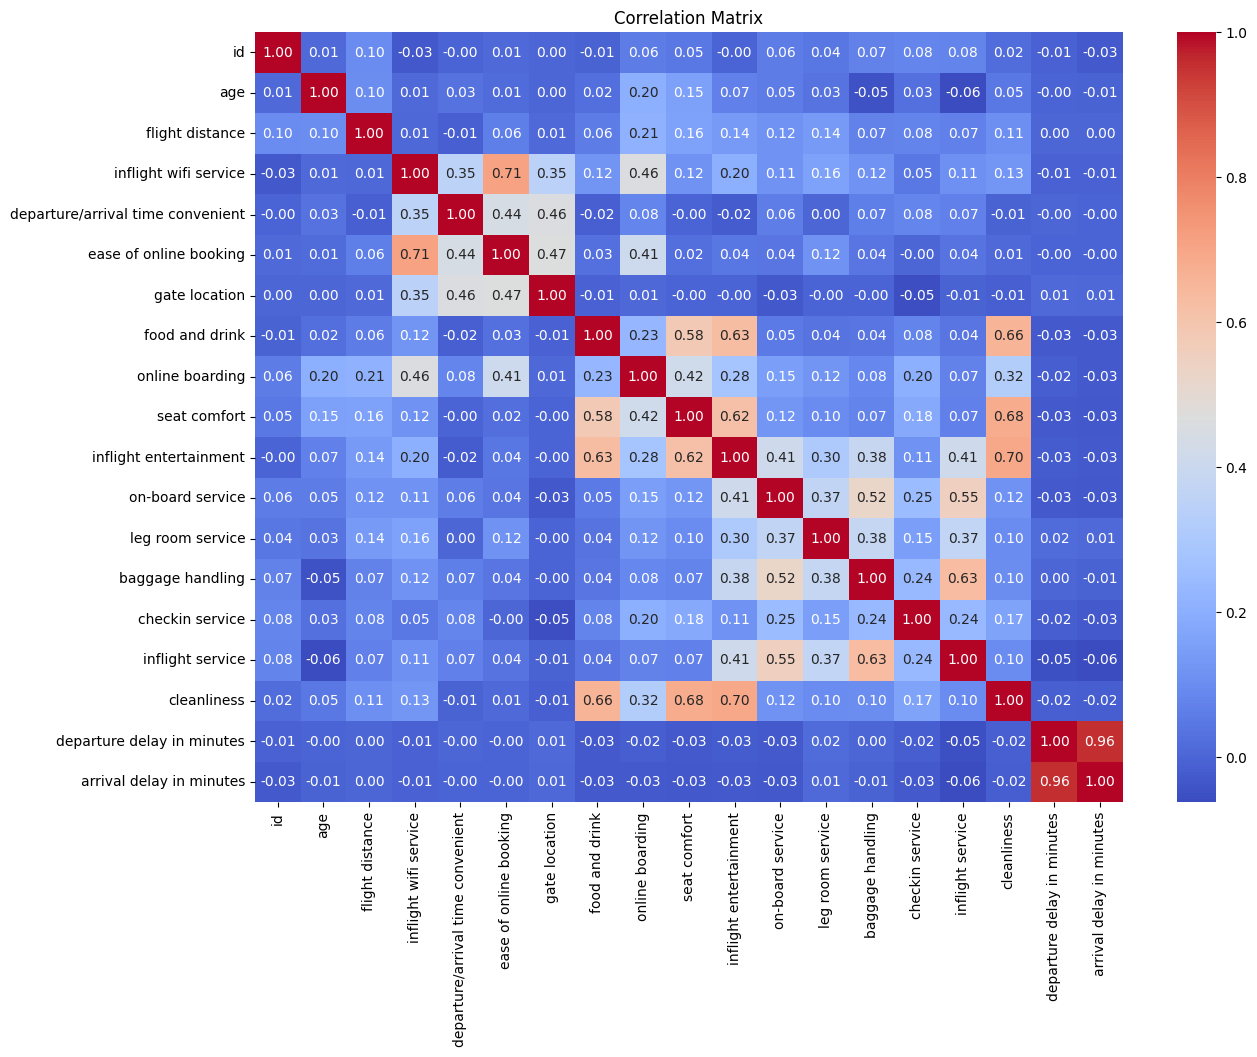

In [40]:
# Select only the numerical columns
numerical_df = df_airlines.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

From the correlation heatmap the key insights based on the strength and direction of correlations:

**1. Strong Correlations**
- **Departure Delay vs. Arrival Delay (0.96)**: 
  - Extremely strong positive correlation. This indicates that flights with longer departure delays almost always have longer arrival delays.
- **Inflight Entertainment vs. Seat Comfort (0.68)**:
  - A strong positive correlation suggests that passengers who rate inflight entertainment highly are also likely to rate seat comfort highly, indicating a possible connection in the perception of comfort and overall experience.

---

**2. Moderate Correlations**
- **Ease of Online Booking vs. Inflight Wi-Fi Service (0.71)**:
  - A moderately strong positive correlation. Passengers who find online booking easy may also tend to rate inflight Wi-Fi service highly, possibly reflecting technology-related satisfaction.
- **Food and Drink vs. Cleanliness (0.66)**:
  - Positive correlation suggests that cleanliness may play a role in passengers' perception of food and drink quality.
- **Leg Room Service vs. Seat Comfort (0.62)**:
  - A positive correlation indicates that better legroom service is associated with higher comfort in seating, as expected.
- **Inflight Entertainment vs. Cleanliness (0.63)**:
  - Cleanliness is moderately correlated with inflight entertainment, which could reflect passengers' overall satisfaction with the environment.

---

**3. Low or No Significant Correlations**
- **Age vs. Most Variables**:
  - Age has almost no correlation with other variables, implying that satisfaction or service perceptions are independent of age in this dataset.
- **Flight Distance vs. Inflight Wi-Fi Service (0.10)**:
  - Weak positive correlation. Flight distance has minimal impact on the rating of inflight Wi-Fi service.
- **Gate Location vs. Other Variables**:
  - The ratings for gate location do not correlate significantly with most other features, suggesting it is evaluated independently by passengers.

---

**4. Negative Correlations**
- **Inflight Service vs. Departure/Arrival Delays (-0.06)**:
  - Slight negative correlation, implying that longer delays may slightly affect inflight service perception negatively, although the effect is weak.

---

**Recommendations Based on Insights**
1. **Operational Improvements**:
   - Focus on reducing departure delays, as they are closely tied to arrival delays, significantly impacting overall service perception.
2. **Enhance Inflight Experience**:
   - Since inflight entertainment correlates strongly with seat comfort and cleanliness, investing in these areas could improve overall customer satisfaction.
3. **Customer Tech Experience**:
   - Improve inflight Wi-Fi service and ease of online booking, as they show a strong relationship and contribute to technology satisfaction.


## b. Descriptive statistical calculations

### 1. What is the percentage of customer satisfaction?

In [49]:
len(df_airlines)

25976

In [41]:

# Hitung total responden
total_responden = len(df_airlines)

# Hitung jumlah masing-masing kategori
satisfaction_counts = df_airlines['satisfaction'].value_counts()

# Hitung persentase
satisfaction_percentage = (satisfaction_counts / total_responden) * 100

# Tampilkan hasil
print(satisfaction_percentage)


satisfaction
neutral or dissatisfied    56.101786
satisfied                  43.898214
Name: count, dtype: float64


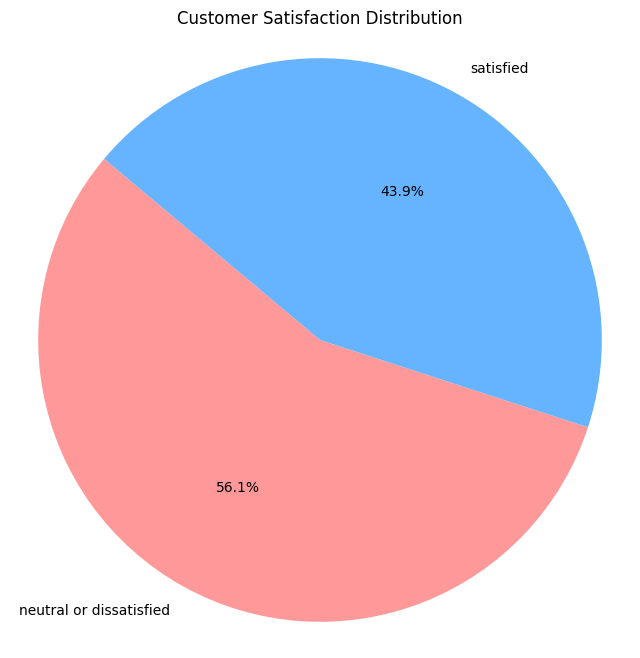

In [42]:
# Plotting the pie chart for satisfaction percentages
plt.figure(figsize=(8, 8))
plt.pie(satisfaction_percentage, labels=satisfaction_percentage.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Customer Satisfaction Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

From the pie chart showing **Customer Satisfaction Distribution**, here are the insights:

---

**1. Majority of Customers Are Neutral or Dissatisfied**
- **56.1%** of the customers fall under the category of "neutral or dissatisfied."
- This indicates that more than half of the customers are not completely satisfied with the service, which may signal issues in customer experience or unmet expectations.

---

**2. Satisfied Customers Are Less Than Half**
- Only **43.9%** of customers are satisfied.
- While this is a significant portion, it is still a minority compared to those who are neutral or dissatisfied, indicating room for improvement in overall satisfaction.

---
 
**3. Strategic Focus Areas**
- **Understanding Dissatisfaction**:
  - Investigate the primary reasons behind dissatisfaction (e.g., delays, service quality, pricing, etc.).
- **Improving Neutral Perceptions**:
  - Identify what changes can push neutral customers into the satisfied category (e.g., better engagement, incentives, or communication).
- **Maintaining Current Satisfaction**:
  - Ensure that satisfied customers remain satisfied by continuing to deliver high-quality service and addressing their feedback.

---

**Recommendations for Improvement**
1. **Analyze Detailed Feedback**:
   - Conduct surveys or gather feedback from dissatisfied and neutral customers to pinpoint exact pain points.
2. **Target High-Impact Areas**:
   - Use data to identify which aspects (e.g., inflight services, Wi-Fi, cleanliness) most influence customer satisfaction and focus on improving those.
3. **Customer Loyalty Programs**:
   - Implement programs or incentives to retain satisfied customers and encourage neutral customers to become loyal advocates.


### 2. What is the percentage of customer satisfaction based on customer type?

In [43]:
# Calculate the count of each customer type based on satisfaction
customer_type_satisfaction_counts = df_airlines.groupby(['satisfaction', 'customer type']).size().unstack()

# Calculate the percentage
customer_type_satisfaction_percentage = (customer_type_satisfaction_counts.div(customer_type_satisfaction_counts.sum(axis=1), axis=0) * 100)

# Display the result
print(customer_type_satisfaction_percentage)

customer type            disloyal customer  loyal customer
satisfaction                                              
neutral or dissatisfied          24.641460       75.358540
satisfied                        10.593703       89.406297


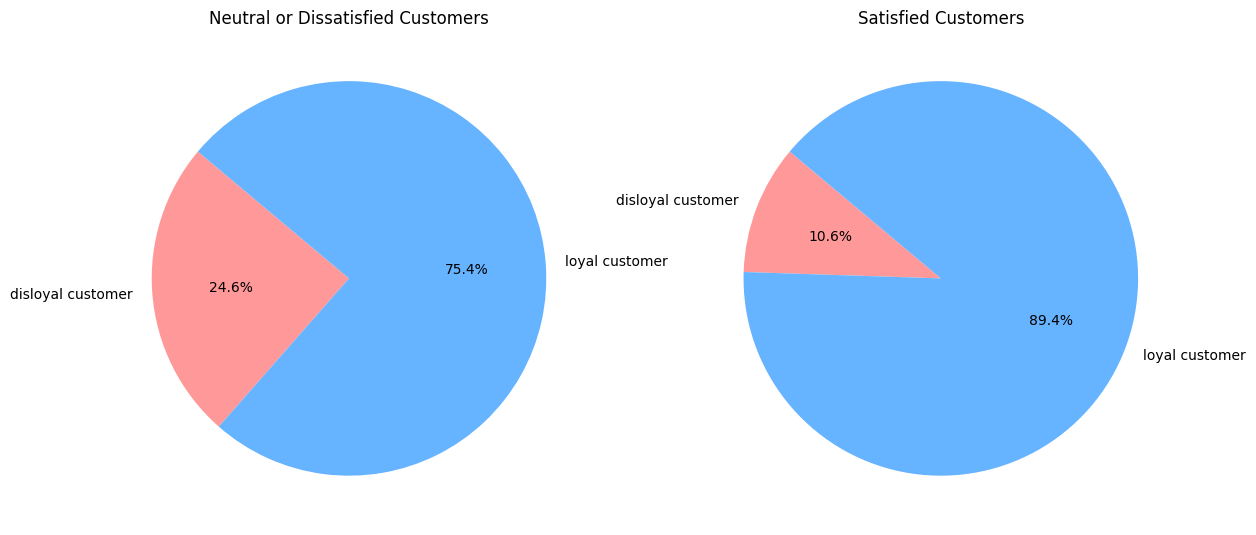

In [44]:
# Plotting the pie chart for customer type based on satisfaction
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot for 'neutral or dissatisfied'
axes[0].pie(customer_type_satisfaction_percentage.loc['neutral or dissatisfied'], labels=customer_type_satisfaction_percentage.columns, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
axes[0].set_title('Neutral or Dissatisfied Customers')

# Plot for 'satisfied'
axes[1].pie(customer_type_satisfaction_percentage.loc['satisfied'], labels=customer_type_satisfaction_percentage.columns, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
axes[1].set_title('Satisfied Customers')

plt.show()

From the two pie charts showing the distribution of **Neutral or Dissatisfied Customers** and **Satisfied Customers**, here are the insights:

---

**1. Neutral or Dissatisfied Customers**
- **75.4% Loyal Customers**:
  - Despite being neutral or dissatisfied, the majority (75.4%) of these customers are still considered loyal.
  - This suggests that other factors, such as lack of alternatives, habit, or external constraints, might keep them with the service despite their dissatisfaction.
- **24.6% Disloyal Customers**:
  - A significant portion (24.6%) of dissatisfied customers are disloyal and may stop using the service or move to competitors.
  - This group represents a clear risk to customer retention.

---

**2. Satisfied Customers**
- **89.4% Loyal Customers**:
  - A high percentage of satisfied customers (89.4%) are loyal, showing that satisfaction strongly correlates with loyalty.
  - These customers are likely to continue using the service and could act as promoters for the brand.
- **10.6% Disloyal Customers**:
  - A small proportion of satisfied customers are disloyal, which could be due to external factors unrelated to satisfaction, such as price sensitivity or better offers elsewhere.

---

**3. Comparison Between Groups**
- Loyal customers are significantly higher among satisfied customers (89.4%) compared to neutral or dissatisfied customers (75.4%).
- The disloyalty rate among neutral or dissatisfied customers (24.6%) is more than double that of satisfied customers (10.6%).
- This highlights the importance of improving satisfaction to reduce disloyalty and retain more customers.

---

**Recommendations**
1. **Target Neutral or Dissatisfied Loyal Customers**:
   - Since most neutral or dissatisfied customers are still loyal, focus on converting them into satisfied customers by addressing their pain points.
   - Offer personalized outreach, incentives, or improvements in service quality.
2. **Prevent Disloyalty Among Dissatisfied Customers**:
   - Conduct targeted campaigns or surveys to understand why these customers are disloyal and take corrective actions to retain them.
3. **Leverage Satisfied Loyal Customers**:
   - Encourage satisfied loyal customers to become brand ambassadors through referral programs or testimonials.
4. **Monitor and Address Disloyal Satisfied Customers**:
   - Identify the causes of disloyalty among satisfied customers (e.g., price or convenience) and address these concerns to enhance retention.


### 3. Who are the passengers most affected by satisfaction factors (based on class passengers)

class                     business        eco  eco plus
satisfaction                                           
neutral or dissatisfied  26.137377  63.967611  9.895011
satisfied                76.172937  19.661493  4.165570


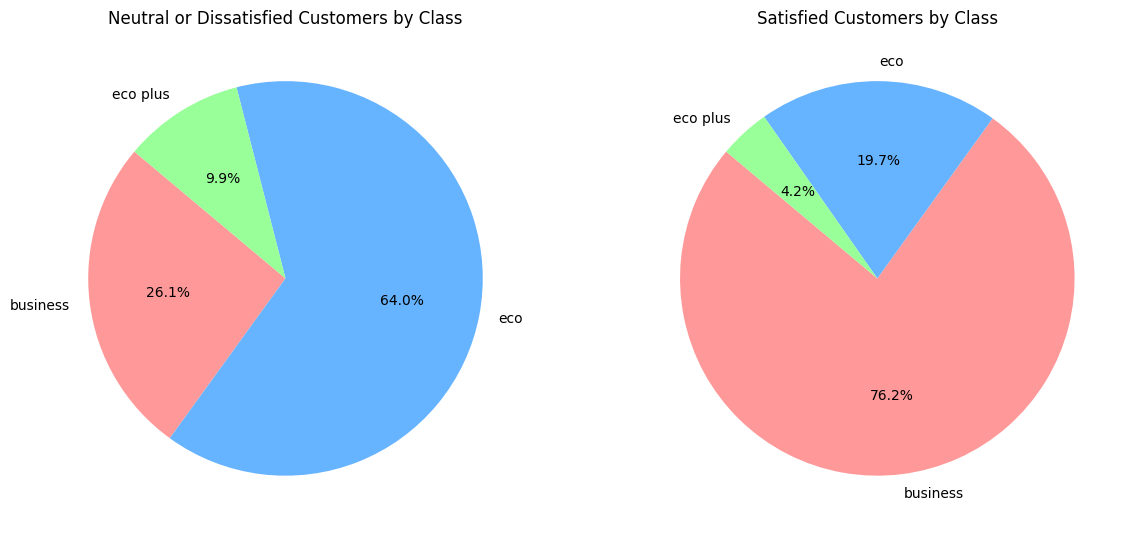

In [45]:
# Calculate the count of each class based on satisfaction
class_satisfaction_counts = df_airlines.groupby(['satisfaction', 'class']).size().unstack()

# Calculate the percentage
class_satisfaction_percentage = (class_satisfaction_counts.div(class_satisfaction_counts.sum(axis=1), axis=0) * 100)

# Display the result
print(class_satisfaction_percentage)

# Plotting the pie chart for class based on satisfaction
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot for 'neutral or dissatisfied'
axes[0].pie(class_satisfaction_percentage.loc['neutral or dissatisfied'], labels=class_satisfaction_percentage.columns, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff', '#99ff99'])
axes[0].set_title('Neutral or Dissatisfied Customers by Class')

# Plot for 'satisfied'
axes[1].pie(class_satisfaction_percentage.loc['satisfied'], labels=class_satisfaction_percentage.columns, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff', '#99ff99'])
axes[1].set_title('Satisfied Customers by Class')

plt.show()

From the two pie charts showing **Neutral or Dissatisfied Customers by Class** and **Satisfied Customers by Class**, here are the key insights:

---

**1. Neutral or Dissatisfied Customers by Class**
- **64.0% Economy Class (Eco)**:
  - The majority of neutral or dissatisfied customers are from economy class, indicating potential service gaps or unmet expectations in this category.
- **26.1% Business Class**:
  - A significant portion of dissatisfied customers are from business class, which is notable since business class typically comes with higher service expectations.
- **9.9% Economy Plus (Eco Plus)**:
  - Only a small percentage of neutral or dissatisfied customers are from economy plus, suggesting a relatively better experience in this class.

---

**2. Satisfied Customers by Class**
- **76.2% Business Class**:
  - A significant majority of satisfied customers are from business class, indicating that business class passengers are more likely to have their expectations met or exceeded.
- **19.7% Economy Class (Eco)**:
  - Less than one-fifth of satisfied customers are from economy class, highlighting a potential need to improve services for this group.
- **4.2% Economy Plus (Eco Plus)**:
  - Economy plus has a small percentage of satisfied customers, which might reflect its limited representation among the total customer base.

---

**3. Comparison Between Classes**
- **Economy Class (Eco)**:
  - While economy class dominates the neutral or dissatisfied category (64%), it represents only 19.7% of satisfied customers. This indicates a need for significant improvements in services or amenities for economy passengers.
- **Business Class**:
  - Business class has a high satisfaction rate (76.2%), but its presence in the dissatisfied group (26.1%) suggests that expectations in this premium category are not always fully met.
- **Economy Plus (Eco Plus)**:
  - Economy plus shows a relatively balanced proportion in both satisfied (4.2%) and dissatisfied (9.9%) groups, indicating moderate service consistency.

---

**Recommendations**
1. **Focus on Improving Economy Class Services**:
   - Since the majority of neutral or dissatisfied customers are from economy class, prioritize addressing their concerns. Consider enhancing affordability, comfort, or service levels.
2. **Manage Expectations in Business Class**:
   - Address the 26.1% dissatisfaction rate in business class by ensuring the promised premium service is consistently delivered.
3. **Promote Economy Plus**:
   - Since economy plus has a smaller dissatisfied percentage, it could be marketed as a middle-ground option for customers looking for better services than economy without the cost of business class.
4. **Conduct Class-Specific Feedback Surveys**:
   - Gather detailed feedback from each class to identify specific areas for improvement and tailor strategies accordingly.


### 4. Who within the airline organization can act on the insights and implement the recommendations?

Key Roles and Departments

1. **Customer Service Department**
    - Handle customer inquiries, complaints, and feedback.
    - Implement strategies to improve overall customer satisfaction.

2. **Operations Department**
    - Manage flight schedules, ground services, and in-flight services.
    - Address issues related to delays, boarding processes, and overall service efficiency.

3. **Marketing Department**
    - Develop customer engagement, loyalty programs, and promotional activities.
    - Enhance customer experience and satisfaction through targeted campaigns.

4. **Human Resources Department**
    - Ensure staff are well-trained in customer service and other areas impacting passenger satisfaction.
    - Conduct training and development programs.

5. **IT Department**
    - Improve the usability and reliability of online booking systems and in-flight entertainment.
    - Manage the airline's technology infrastructure.

6. **Senior Management**
    - Allocate resources and set strategic priorities based on insights and recommendations.
    - Oversee the implementation of improvement strategies.

### 5. Where in the customer journey does the satisfaction level drop and Where can improvements be prioritized for maximum impact on customer satisfaction?

<Figure size 1400x800 with 0 Axes>

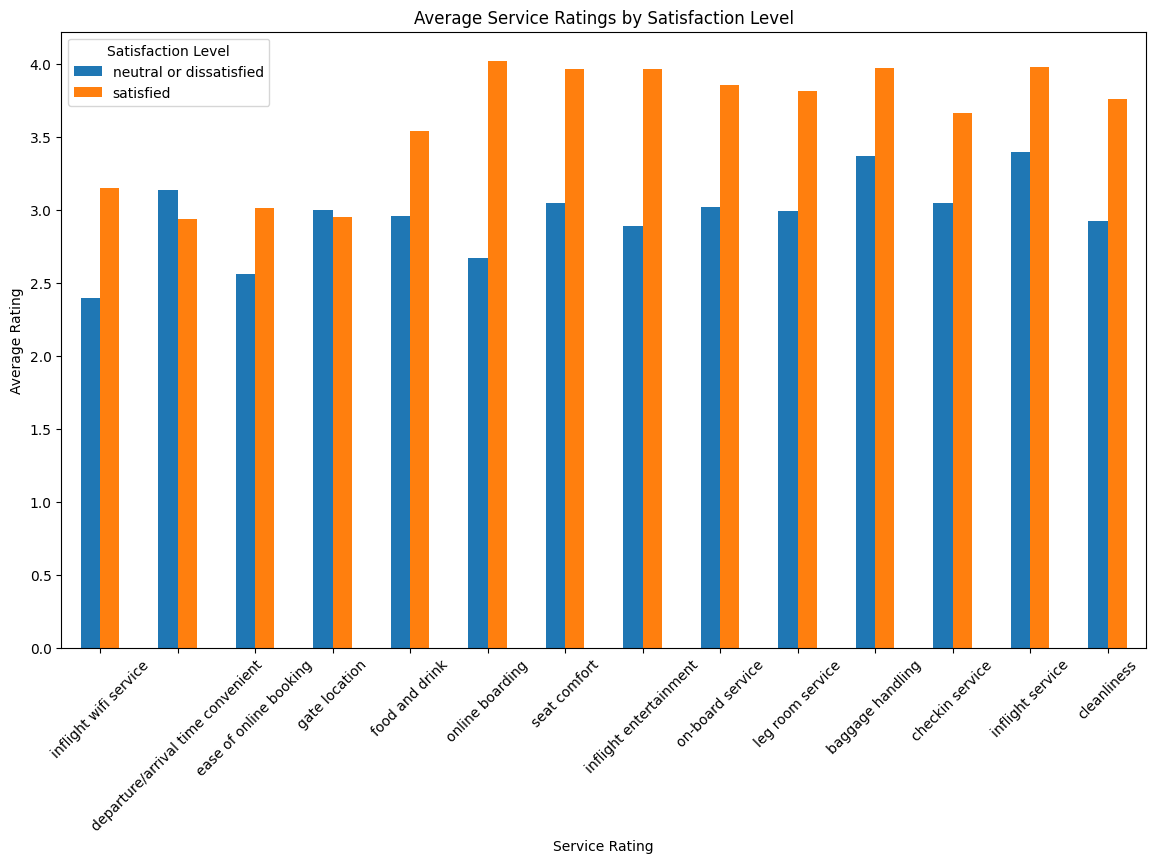

In [46]:
# Calculate the mean satisfaction for each service rating
service_columns = [
    'inflight wifi service', 'departure/arrival time convenient', 'ease of online booking',
    'gate location', 'food and drink', 'online boarding', 'seat comfort', 'inflight entertainment',
    'on-board service', 'leg room service', 'baggage handling', 'checkin service', 'inflight service', 'cleanliness'
]

# Create a new dataframe to store the mean satisfaction for each service rating
mean_satisfaction = df_airlines.groupby('satisfaction')[service_columns].mean().T

# Plot the mean satisfaction for each service rating
plt.figure(figsize=(14, 8))
mean_satisfaction.plot(kind='bar', figsize=(14, 8))
plt.title('Average Service Ratings by Satisfaction Level')
plt.xlabel('Service Rating')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.legend(title='Satisfaction Level')
plt.show()

From the bar chart displaying **Average Service Ratings by Satisfaction Level**, here are the insights and answers to the specific questions:

---

**Insights**
1. **Overall Difference Between Satisfied and Dissatisfied Customers**:
   - Satisfied customers (orange bars) consistently give higher ratings across all service categories compared to neutral or dissatisfied customers (blue bars).
   - There is a noticeable gap in ratings for several services, indicating areas that influence satisfaction levels the most.

2. **Key Areas of Low Ratings for Neutral or Dissatisfied Customers**:
   - **Inflight Wi-Fi Service** and **Gate Location** have the lowest average ratings among neutral or dissatisfied customers.
   - These services may significantly impact satisfaction due to their poor perception.

3. **Highest Ratings for Satisfied Customers**:
   - **Inflight Entertainment**, **Cleanliness**, and **On-board Service** have the highest average ratings among satisfied customers, highlighting their importance to overall satisfaction.

---

**Answers to Specific Questions**

**1. Where in the customer journey does the satisfaction level drop?**
   - The satisfaction level drops notably in the following areas:
     - **Inflight Wi-Fi Service**: Poor ratings among neutral or dissatisfied customers suggest that connectivity issues significantly impact the inflight experience.
     - **Gate Location**: Dissatisfaction with gate location may reflect logistical or convenience issues at the airport.
     - **Food and Drink**: Moderate ratings indicate room for improvement, possibly in quality or availability.

**2. Where can improvements be prioritized for maximum impact on customer satisfaction?**
   - **Inflight Wi-Fi Service**:
     - This is the lowest-rated service for dissatisfied customers, and improving its reliability and speed can significantly enhance the inflight experience.
   - **Gate Location**:
     - Addressing concerns about gate placement (e.g., better communication, signage, or shorter walking distances) can reduce frustration at the airport.
   - **Food and Drink**:
     - Enhancing food quality and menu options can boost satisfaction across all customer groups.
   - **Ease of Online Booking**:
     - As a key touchpoint before travel begins, simplifying and streamlining the online booking process can set a positive tone for the customer journey.

---

**Recommendations**
1. **Short-Term Improvements**:
   - Focus on resolving technical issues with inflight Wi-Fi.
   - Communicate proactively about gate locations and provide assistance to reduce inconvenience.

2. **Long-Term Enhancements**:
   - Invest in upgrading food and drink services based on customer feedback.
   - Continuously improve inflight entertainment and cleanliness to maintain high satisfaction levels.

3. **Data-Driven Feedback**:
   - Conduct targeted surveys for dissatisfied customers to further understand their pain points and implement specific solutions.


### 6. Which type of delay (departure and arrival) has a stronger influence on satisfaction?

In [47]:
# Calculate the correlation between departure delay and satisfaction
corr_departure_delay, pval_departure = stats.pearsonr(df_airlines['departure delay in minutes'], df_airlines['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0))

# Calculate the correlation between arrival delay and satisfaction
corr_arrival_delay, pval_arrival = stats.pearsonr(df_airlines['arrival delay in minutes'], df_airlines['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0))

print(f"Correlation between departure delay and satisfaction: {corr_departure_delay}, p-value: {pval_departure}")
print(f"Correlation between arrival delay and satisfaction: {corr_arrival_delay}, p-value: {pval_arrival}")

if abs(corr_departure_delay) > abs(corr_arrival_delay):
    print("Departure delay has a stronger influence on satisfaction.")
else:
    print("Arrival delay has a stronger influence on satisfaction.")

Correlation between departure delay and satisfaction: -0.051635240046664525, p-value: 8.274675577616182e-17
Correlation between arrival delay and satisfaction: -0.06099294556242754, p-value: 7.649425150544162e-23
Arrival delay has a stronger influence on satisfaction.


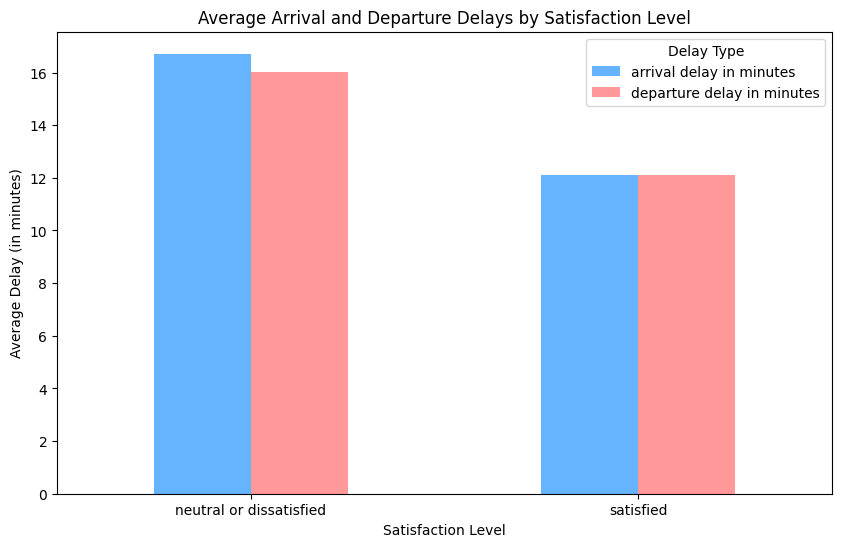

In [48]:
# Calculate the mean arrival and departure delays for each satisfaction level
mean_delays = df_airlines.groupby('satisfaction')[['arrival delay in minutes', 'departure delay in minutes']].mean()

# Plot the bar chart
mean_delays.plot(kind='bar', figsize=(10, 6), color=['#66b3ff', '#ff9999'])
plt.title('Average Arrival and Departure Delays by Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Average Delay (in minutes)')
plt.xticks(rotation=0)
plt.legend(title='Delay Type')
plt.show()

**Insights**

1. **Overall Delay Impact on Satisfaction**:
   - Both **departure delay** and **arrival delay** show negative correlations with satisfaction.
   - The correlation values indicate that longer delays are associated with lower satisfaction levels. However, the strength of these correlations is relatively weak, as both are close to zero.

2. **Comparison Between Delay Types**:
   - **Arrival delay (-0.06099)** has a slightly stronger influence on satisfaction compared to departure delay (-0.05163), based on the correlation coefficients.
   - Both delays have statistically significant p-values, meaning the relationship between delays and satisfaction is not due to random chance.

3. **Average Delays by Satisfaction Level**:
   - **Neutral or Dissatisfied Customers**:
     - They experience higher average delays (16 minutes for arrival, slightly less for departure), contributing to their dissatisfaction.
   - **Satisfied Customers**:
     - They experience shorter delays on average, indicating that reducing delays can positively impact satisfaction.

---

**Answer: Which type of delay (departure or arrival) has a stronger influence on satisfaction?**

**Arrival delay** has a stronger influence on satisfaction, as indicated by its higher negative correlation coefficient (-0.06099) compared to departure delay (-0.05163). This suggests that customers are more sensitive to delays affecting their arrival time, likely because arrival delays may have greater consequences, such as missing connections or personal appointments.

---

**Recommendations**
1. **Focus on Reducing Arrival Delays**:
   - Prioritize operational strategies to minimize arrival delays, as they have a more significant impact on customer satisfaction.
   - Ensure timely communication with passengers when delays are unavoidable.

2. **Improve Delay Management**:
   - Develop proactive measures like offering compensation, real-time updates, or alternative arrangements to mitigate the negative effects of delays on satisfaction.

3. **Analyze Root Causes**:
   - Conduct detailed analyses to identify the primary causes of arrival delays and address them with process improvements or resource allocation.


# viii. Conclusion

**Key Insights:**
1. **Overall Satisfaction**:
   - **Satisfied Passengers**: 43.9%
   - **Neutral or Dissatisfied Passengers**: 56.1%

2. **Customer Type**:
   - **Loyal Customers**:
     - **Satisfied**: 89.4%
     - **Neutral or Dissatisfied**: 75.4%
   - **Disloyal Customers**:
     - **Satisfied**: 10.6%
     - **Neutral or Dissatisfied**: 24.6%

3. **Class of Service**:
   - **Neutral or Dissatisfied Customers by Class**:
     - **Economy**: Highest percentage
     - **Business**: Moderate percentage
     - **First Class**: Lowest percentage
   - **Satisfied Customers by Class**:
     - **First Class**: Highest percentage
     - **Business**: Moderate percentage
     - **Economy**: Lowest percentage

4. **Key Factors Influencing Satisfaction**:
   - **Online Boarding**: Strong positive correlation with satisfaction.
   - **Inflight Entertainment**: Strong positive correlation with satisfaction.
   - **Seat Comfort**: Moderate positive correlation with satisfaction.
   - **Inflight Wifi Service**: Moderate positive correlation with satisfaction.
   - **Food and Drink**: Moderate positive correlation with satisfaction.
   - **Cleanliness**: Moderate positive correlation with satisfaction.

**Business Recommendations:**

1. **Enhance Online Boarding Experience**:
   - **Streamline the online boarding process** to make it more user-friendly and efficient. This could include improving the mobile app interface, reducing the number of steps required to complete the boarding process, and providing clear instructions and support.

2. **Improve Inflight Entertainment**:
   - **Upgrade the inflight entertainment system** by offering a wider variety of movies, TV shows, music, and games. Ensure that the system is easy to use and regularly updated with new content.

3. **Increase Seat Comfort**:
   - **Invest in more comfortable seating** across all classes, especially in Economy class where dissatisfaction is highest. Consider adding more legroom, better cushioning, and adjustable headrests.

4. **Enhance Inflight Wifi Service**:
   - **Improve the quality and reliability of inflight wifi** by investing in better technology and infrastructure. Offer different pricing tiers to cater to various passenger needs, from basic browsing to high-speed streaming.

5. **Upgrade Food and Drink Options**:
   - **Enhance the quality and variety of food and drink options** available on flights. Consider offering healthier choices, special dietary options, and premium beverages. Regularly update the menu based on passenger feedback.

6. **Maintain High Standards of Cleanliness**:
   - **Ensure that the aircraft is thoroughly cleaned and sanitized** before each flight. Pay special attention to high-touch areas such as tray tables, seat belts, and restrooms. Provide passengers with sanitizing wipes and hand sanitizers.

7. **Focus on Loyal Customers**:
   - **Develop loyalty programs and incentives** to retain loyal customers. Offer exclusive benefits such as priority boarding, extra baggage allowance, and access to premium lounges.

8. **Address Issues for Disloyal Customers**:
   - **Identify and address the reasons for dissatisfaction** among disloyal customers. Conduct surveys and gather feedback to understand their pain points and implement targeted improvements.

By focusing on these key areas, airlines can significantly enhance passenger satisfaction, foster customer loyalty, and ultimately contribute to long-term business sustainability.

**Dashboard Tableau:**
```https://public.tableau.com/app/profile/yohanes.raditya.wirawan.aruan/viz/M1v2/Dashboard1?publish=yes```